<a href="https://colab.research.google.com/github/Aqillaaprly/Rakamin_FinalProject_DS59/blob/Mercy/Stage_2_Cluster%2C_Regresi%2C_Optimal_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [25]:
df = pd.read_csv("recruitment_efficiency_improved.csv")
df.head()

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate
0,1,Engineering,Software Engineer,280,24,1400.38,Referral,0.98
1,2,Sales,Account Executive,262,7,2730.45,LinkedIn,0.84
2,3,Product,UX Designer,11,76,5286.12,LinkedIn,0.83
3,4,Engineering,DevOps Engineer,238,26,5255.78,Recruiter,0.49
4,5,HR,Talent Acquisition,275,37,4987.03,LinkedIn,0.79


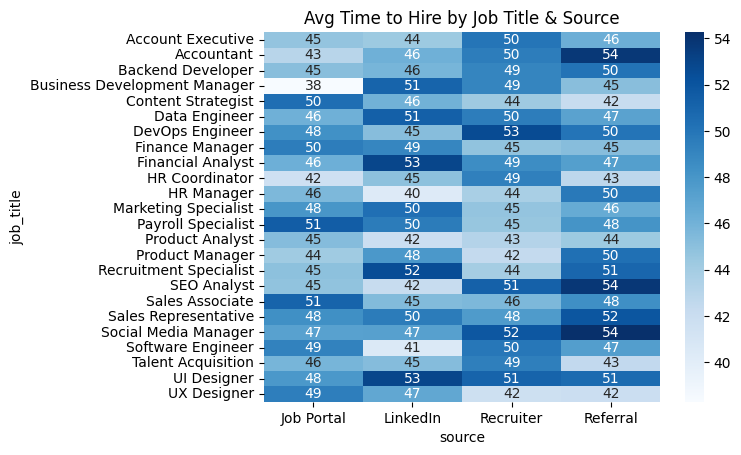

In [26]:
#Heatmap Correlation between source and job_title for time to hire
pivot = df.pivot_table(
    index="job_title",
    columns="source",
    values="time_to_hire_days",
    aggfunc="mean"
)
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Avg Time to Hire by Job Title & Source")
plt.show()

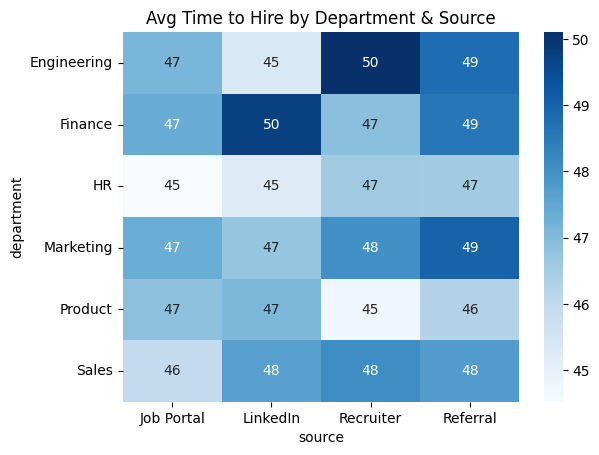

In [27]:
#Heatmap Correlation between source and department for time to hire
pivot = df.pivot_table(
    index="department",
    columns="source",
    values="time_to_hire_days",
    aggfunc="mean"
)
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Avg Time to Hire by Department & Source")
plt.show()

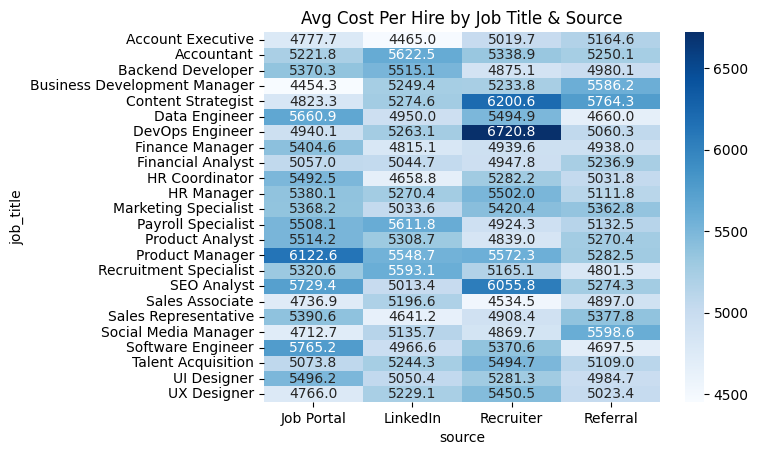

In [28]:
#Heatmap Correlation between source and job_title for cost per hire
pivot = df.pivot_table(
    index="job_title",
    columns="source",
    values="cost_per_hire",
    aggfunc="mean"
)
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Blues")
plt.title("Avg Cost Per Hire by Job Title & Source")
plt.show()

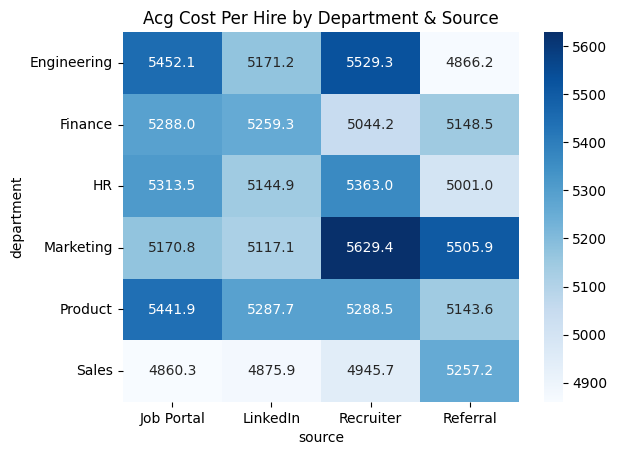

In [29]:
#Heatmap Correlation between source and department for cost per hire
pivot = df.pivot_table(
    index="department",
    columns="source",
    values="cost_per_hire",
    aggfunc="mean"
)
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Blues")
plt.title("Acg Cost Per Hire by Department & Source")
plt.show()

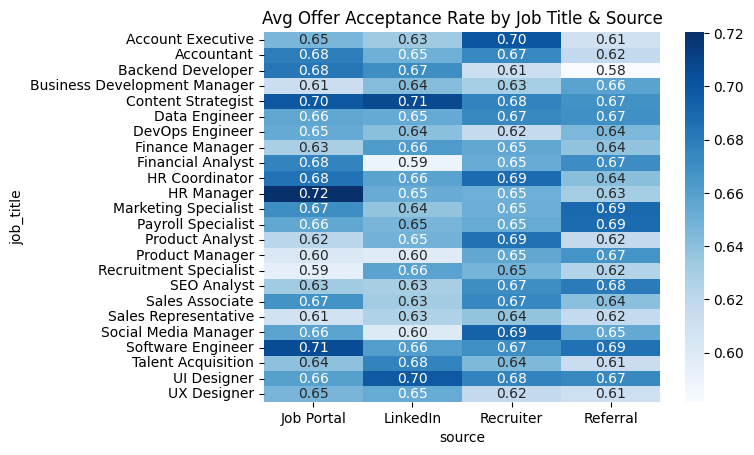

In [30]:
#Heatmap Correlation between source and job_title for offering acceptance rate
pivot = df.pivot_table(
    index="job_title",
    columns="source",
    values="offer_acceptance_rate",
    aggfunc="mean"
)
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Blues")
plt.title("Avg Offer Acceptance Rate by Job Title & Source")
plt.show()

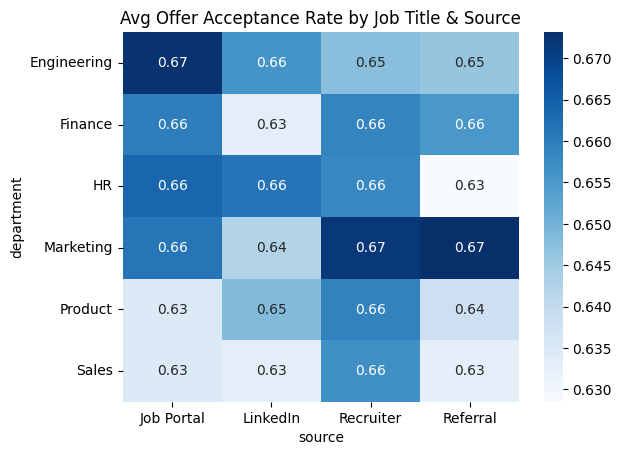

In [31]:
#Heatmap Correlation between source and department for offering acceptance rate
pivot = df.pivot_table(
    index="department",
    columns="source",
    values="offer_acceptance_rate",
    aggfunc="mean"
)
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Blues")
plt.title("Avg Offer Acceptance Rate by Job Title & Source")
plt.show()

In [32]:
# Pisahkan fitur numerik, kategorikal

numerical_cols = ['num_applicants', 'time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']
categorical_cols = ['department', 'job_title', 'source']
targets = ['time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']

print("Kolom Numerik:")
print(numerical_cols)

print("\nKolom Kategorikal:")
print(categorical_cols)

Kolom Numerik:
['num_applicants', 'time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']

Kolom Kategorikal:
['department', 'job_title', 'source']


Add new feature to increase variety in data

In [33]:
df['efficiency_score'] = df['offer_acceptance_rate'] / df['time_to_hire_days'].replace(0, np.nan) #
df['time_cost_interaction'] = df['cost_per_hire'] * df['time_to_hire_days']

In [34]:
df.sample(10)

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate,efficiency_score,time_cost_interaction
3367,3368,Engineering,Software Engineer,151,74,7460.02,Referral,0.39,0.005270,552041.48
3372,3373,HR,HR Coordinator,206,77,2678.06,LinkedIn,0.38,0.004935,206210.62
3323,3324,Product,Product Manager,205,20,6514.09,LinkedIn,0.59,0.029500,130281.80
3115,3116,Engineering,DevOps Engineer,237,44,3441.86,Job Portal,0.85,0.019318,151441.84
4825,4826,Product,Product Analyst,121,9,1018.05,Job Portal,0.62,0.068889,9162.45
4225,4226,Marketing,Social Media Manager,164,79,7510.46,Referral,0.72,0.009114,593326.34
755,756,Engineering,Data Engineer,187,24,7200.59,Referral,0.98,0.040833,172814.16
1151,1152,Finance,Financial Analyst,108,84,1647.55,Job Portal,0.90,0.010714,138394.20
3799,3800,Engineering,Software Engineer,173,10,6357.79,Referral,0.53,0.053000,63577.90
382,383,HR,HR Manager,167,7,1730.93,Recruiter,0.49,0.070000,12116.51


OHE the data

In [35]:
pd.get_dummies(df['department'])
pd.get_dummies(df['source'])
pd.get_dummies(df['job_title'])

df = pd.concat([
    df,
    pd.get_dummies(df['department'], prefix='department').astype('int'),
    pd.get_dummies(df['source'], prefix='source').astype('int'),
    pd.get_dummies(df['job_title'], prefix='job_title').astype('int')
], axis=1)

Cluster the data to increase variability

In [36]:
drop_columns = ['time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate', 'recruitment_id', 'department', 'source', 'job_title']
cluster_features = df.drop(drop_columns, axis = 1)

In [37]:
cluster_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   num_applicants                          5000 non-null   int64  
 1   efficiency_score                        5000 non-null   float64
 2   time_cost_interaction                   5000 non-null   float64
 3   department_Engineering                  5000 non-null   int64  
 4   department_Finance                      5000 non-null   int64  
 5   department_HR                           5000 non-null   int64  
 6   department_Marketing                    5000 non-null   int64  
 7   department_Product                      5000 non-null   int64  
 8   department_Sales                        5000 non-null   int64  
 9   source_Job Portal                       5000 non-null   int64  
 10  source_LinkedIn                         5000 non-null   int6

In [38]:
from sklearn.preprocessing import StandardScaler

scaler_cluster = StandardScaler()
X_cluster = scaler_cluster.fit_transform(cluster_features)

In [39]:
X_cluster

array([[ 1.47796029,  0.99721564, -1.11207608, ..., -0.20938323,
        -0.20729298, -0.22108302],
       [ 1.26407141,  4.98723872, -1.18814345, ..., -0.20938323,
        -0.20729298, -0.22108302],
       [-1.71849022, -0.51037203,  0.81971164, ..., -0.20938323,
        -0.20729298,  4.52318776],
       ...,
       [ 0.76499735, -0.28540717, -0.6463612 , ..., -0.20938323,
        -0.20729298, -0.22108302],
       [-1.10058901, -0.6026118 ,  2.05758972, ..., -0.20938323,
        -0.20729298, -0.22108302],
       [-0.31632977, -0.45764524, -0.743888  , ..., -0.20938323,
        -0.20729298, -0.22108302]])

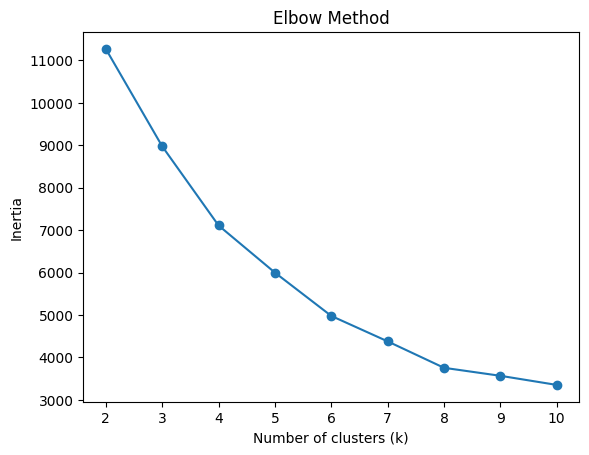

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['time_to_hire_days', 'offer_acceptance_rate', 'cost_per_hire']
df_kmeans = df[features].copy()

scaler = StandardScaler()
scaled = scaler.fit_transform(df_kmeans)

inertia_values = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    inertia_values.append(km.inertia_)

plt.plot(K, inertia_values, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [41]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled)
    sil = silhouette_score(scaled, labels)
    sil_scores.append(sil)

for k, s in zip(range(2, 11), sil_scores):
    print(f"k={k}, silhouette={s:.4f}")

k=2, silhouette=0.2409
k=3, silhouette=0.2385
k=4, silhouette=0.2719
k=5, silhouette=0.2673
k=6, silhouette=0.2870
k=7, silhouette=0.2766
k=8, silhouette=0.2792
k=9, silhouette=0.2690
k=10, silhouette=0.2640


In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_cluster)

print("Cluster distribution:")
print(df['cluster'].value_counts())

Cluster distribution:
cluster
4    1885
2     871
5     803
1     621
3     617
0     203
Name: count, dtype: int64


## Add cluster result to X and decide the target

In [43]:
X = df[cluster_features.columns.tolist() + ['cluster']]

y_time = df['time_to_hire_days']
y_cost = df['cost_per_hire']
y_oar  = df['offer_acceptance_rate']

## Split the data into train and test

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_time, y_test_time = train_test_split(
    X, y_time, test_size=1/3, random_state=42
)

_, _, y_train_cost, y_test_cost = train_test_split(
    X, y_cost, test_size=1/3, random_state=42
)

_, _, y_train_oar, y_test_oar = train_test_split(
    X, y_oar, test_size=1/3, random_state=42
)

## Modeling

In [45]:
from xgboost import XGBRegressor

model_time_xgb = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=5,
    subsample=0.9, colsample_bytree=0.9, random_state=42
)
model_cost_xgb = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=5,
    subsample=0.9, colsample_bytree=0.9, random_state=42
)
model_oar_xgb  = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=5,
    subsample=0.9, colsample_bytree=0.9, random_state=42
)

model_time_xgb.fit(X_train, y_train_time)
model_cost_xgb.fit(X_train, y_train_cost)
model_oar_xgb.fit(X_train, y_train_oar)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [46]:
from sklearn.linear_model import LinearRegression

model_time_lg = LinearRegression()
model_cost_lg = LinearRegression()
model_oar_lg  = LinearRegression()

model_time_lg.fit(X_train, y_train_time)
model_cost_lg.fit(X_train, y_train_cost)
model_oar_lg.fit(X_train, y_train_oar)

LinearRegression()

In [47]:
from sklearn.tree import DecisionTreeRegressor

model_time_dt = DecisionTreeRegressor()
model_cost_dt = DecisionTreeRegressor()
model_oar_dt  = DecisionTreeRegressor()

model_time_dt.fit(X_train, y_train_time)
model_cost_dt.fit(X_train, y_train_cost)
model_oar_dt.fit(X_train, y_train_oar)

DecisionTreeRegressor()

In [48]:
from sklearn.ensemble import RandomForestRegressor
model_time_rf = RandomForestRegressor()
model_cost_rf = RandomForestRegressor()
model_oar_rf  = RandomForestRegressor()

model_time_rf.fit(X_train, y_train_time)
model_cost_rf.fit(X_train, y_train_cost)
model_oar_rf.fit(X_train, y_train_oar)

RandomForestRegressor()

In [49]:
from sklearn.svm import SVR

model_time_svr = RandomForestRegressor()
model_cost_svr = RandomForestRegressor()
model_oar_svr  = RandomForestRegressor()

model_time_svr.fit(X_train, y_train_time)
model_cost_svr.fit(X_train, y_train_cost)
model_oar_svr.fit(X_train, y_train_oar)

RandomForestRegressor()

## Evaluate the result using MAPE RMSE and R2

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

def eval_regression(model, X_train, y_train, X_test, y_test):
    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # MAPE
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

    # R²
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Print results
    print(f"RMSE(train): {rmse_train}")
    print(f"RMSE(test):  {rmse_test}")
    print(f"MAPE(train): {mape_train}")
    print(f"MAPE(test):  {mape_test}")
    print(f"R²(train):   {r2_train}")
    print(f"R²(test):    {r2_test}")

XGBoost Evaluation

In [51]:
print("Cost Per Hire")
eval_regression(model_cost_xgb, X_train, y_train_cost, X_test, y_test_cost)
print("   ")
print("Time to Hire")
eval_regression(model_time_xgb, X_train, y_train_time, X_test, y_test_time)
print("   ")
print("Offering Acceptance Rate")
eval_regression(model_oar_xgb, X_train, y_train_oar, X_test, y_test_oar)

Cost Per Hire
RMSE(train): 831.9383710158983
RMSE(test):  1229.738481901283
MAPE(train): 0.14984728215514734
MAPE(test):  0.2113828402518351
R²(train):   0.9075786169642192
R²(test):    0.7954442645459132
   
Time to Hire
RMSE(train): 7.447373192083112
RMSE(test):  11.045080921434444
MAPE(train): 0.1501893848180771
MAPE(test):  0.21175417304039001
R²(train):   0.9014616012573242
R²(test):    0.7902325391769409
   
Offering Acceptance Rate
RMSE(train): 0.10940228453048843
RMSE(test):  0.14962812466181027
MAPE(train): 0.14924254260316253
MAPE(test):  0.20841178756759007
R²(train):   0.7052054171237561
R²(test):    0.45621063500321735


Linear Regression Evaluation

In [52]:
print("Cost Per Hire")
eval_regression(model_cost_lg, X_train, y_train_cost, X_test, y_test_cost)
print("   ")
print("Time to Hire")
eval_regression(model_time_lg, X_train, y_train_time, X_test, y_test_time)
print("   ")
print("Offering Acceptance Rate")
eval_regression(model_oar_lg, X_train, y_train_oar, X_test, y_test_oar)

Cost Per Hire
RMSE(train): 1737.4693388863964
RMSE(test):  1798.1963519906599
MAPE(train): 0.44253393699718624
MAPE(test):  0.4312925283917736
R²(train):   0.5968891840663457
R²(test):    0.562618551503099
   
Time to Hire
RMSE(train): 13.99834367882123
RMSE(test):  14.621893782596864
MAPE(train): 0.38421184234274175
MAPE(test):  0.40127654520623673
R²(train):   0.6518609785382828
R²(test):    0.6323728405623577
   
Offering Acceptance Rate
RMSE(train): 0.18655528447762126
RMSE(test):  0.1861985989017306
MAPE(train): 0.2835104735028226
MAPE(test):  0.29016732401356976
R²(train):   0.1428006600124474
R²(test):    0.157912808675164


Decision Tree Regressor


In [53]:
print("Cost Per Hire")
eval_regression(model_cost_dt, X_train, y_train_cost, X_test, y_test_cost)
print("   ")
print("Time to Hire")
eval_regression(model_time_dt, X_train, y_train_time, X_test, y_test_time)
print("   ")
print("Offering Acceptance Rate")
eval_regression(model_oar_dt, X_train, y_train_oar, X_test, y_test_oar)

Cost Per Hire
RMSE(train): 0.0
RMSE(test):  1620.1022887537301
MAPE(train): 0.0
MAPE(test):  0.26730291651789806
R²(train):   1.0
R²(test):    0.6449651337663884
   
Time to Hire
RMSE(train): 0.0
RMSE(test):  15.447707715556602
MAPE(train): 0.0
MAPE(test):  0.27619265134634186
R²(train):   1.0
R²(test):    0.5896745766136031
   
Offering Acceptance Rate
RMSE(train): 4.406281354039984e-18
RMSE(test):  0.20953973040995338
MAPE(train): 5.014148392096174e-19
MAPE(test):  0.27133349030772097
R²(train):   1.0
R²(test):    -0.06644142309440237


Random Forest

In [54]:
print("Cost Per Hire")
eval_regression(model_cost_rf, X_train, y_train_cost, X_test, y_test_cost)
print("   ")
print("Time to Hire")
eval_regression(model_time_rf, X_train, y_train_time, X_test, y_test_time)
print("   ")
print("Offering Acceptance Rate")
eval_regression(model_oar_rf, X_train, y_train_oar, X_test, y_test_oar)

Cost Per Hire
RMSE(train): 446.8570703998786
RMSE(test):  1253.4180488327875
MAPE(train): 0.07935653989229143
MAPE(test):  0.21254169362075717
R²(train):   0.9733358698695248
R²(test):    0.7874906601385423
   
Time to Hire
RMSE(train): 4.04533564417681
RMSE(test):  11.162389438306008
MAPE(train): 0.07705269986386237
MAPE(test):  0.21179252749788352
R²(train):   0.9709257498385515
R²(test):    0.7857530344075857
   
Offering Acceptance Rate
RMSE(train): 0.05808024945312869
RMSE(test):  0.1505416482918462
MAPE(train): 0.0781364544237921
MAPE(test):  0.2078310458224691
R²(train):   0.9169148013321521
R²(test):    0.4495503780204898


SVR

In [55]:
print("Cost Per Hire")
eval_regression(model_cost_svr, X_train, y_train_cost, X_test, y_test_cost)
print("   ")
print("Time to Hire")
eval_regression(model_time_svr, X_train, y_train_time, X_test, y_test_time)
print("   ")
print("Offering Acceptance Rate")
eval_regression(model_oar_svr, X_train, y_train_oar, X_test, y_test_oar)

Cost Per Hire
RMSE(train): 445.3593061998017
RMSE(test):  1250.4053469643525
MAPE(train): 0.07890279739402557
MAPE(test):  0.2120001298967877
R²(train):   0.9735143146249923
R²(test):    0.7885110026558966
   
Time to Hire
RMSE(train): 4.018415555459345
RMSE(test):  11.086254409521436
MAPE(train): 0.07708936587355665
MAPE(test):  0.21146460443937112
R²(train):   0.9713114173068326
R²(test):    0.7886656850699056
   
Offering Acceptance Rate
RMSE(train): 0.057647201293572786
RMSE(test):  0.1509194637582965
MAPE(train): 0.07776417547462881
MAPE(test):  0.20824685482994199
R²(train):   0.9181491541148826
R²(test):    0.44678397612540066


# Prediksi Model

In [56]:
df_X = pd.read_csv('synthetic_500_revised.csv')

In [57]:
# Membuat Fitur
df_X['efficiency_score'] = df_X['offer_acceptance_rate'] / df_X['time_to_hire_days'].replace(0, np.nan) #
df_X['time_cost_interaction'] = df_X['cost_per_hire'] * df_X['time_to_hire_days']

# Encoding Kategorikal
pd.get_dummies(df_X['department'])
pd.get_dummies(df_X['source'])
pd.get_dummies(df_X['job_title'])

df_X = pd.concat([
    df_X,
    pd.get_dummies(df_X['department'], prefix='department').astype('int'),
    pd.get_dummies(df_X['source'], prefix='source').astype('int'),
    pd.get_dummies(df_X['job_title'], prefix='job_title').astype('int')
], axis=1)

# Clustering
drop_columns = ['time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate', 'recruitment_id', 'department', 'source', 'job_title']
pred_cluster = df_X.drop(drop_columns, axis = 1)

from sklearn.preprocessing import StandardScaler

scaler_cluster = StandardScaler()
Xpred_clus = scaler_cluster.fit_transform(pred_cluster)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
df_X['cluster'] = kmeans.fit_predict(Xpred_clus)

print("Cluster distribution:")
print(df['cluster'].value_counts())

X_123 = df_X[pred_cluster.columns.tolist() + ['cluster']]

Cluster distribution:
cluster
4    1885
2     871
5     803
1     621
3     617
0     203
Name: count, dtype: int64


In [58]:
X_123['num_applicants'] = X_123['num_applicants'].astype(int)

/tmp/ipython-input-161958606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_123['num_applicants'] = X_123['num_applicants'].astype(int)


In [59]:
X_123

,num_applicants,efficiency_score,time_cost_interaction,department_Engineering,department_Finance,department_HR,department_Marketing,department_Product,department_Sales,source_Job Portal,...,job_title_Recruitment Specialist,job_title_SEO Analyst,job_title_Sales Associate,job_title_Sales Representative,job_title_Social Media Manager,job_title_Software Engineer,job_title_Talent Acquisition,job_title_UI Designer,job_title_UX Designer,cluster
0,159,0.018541,273389.003204,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
1,280,0.008366,531635.156881,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,260,0.010286,30526.502566,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,90,0.005477,249495.060889,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,239,0.024381,315267.630928,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,108,0.018544,212148.581168,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
496,138,0.019435,154345.133980,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
497,115,0.006882,834209.052084,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
498,299,0.014543,84765.915871,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2


In [60]:
X

,num_applicants,efficiency_score,time_cost_interaction,department_Engineering,department_Finance,department_HR,department_Marketing,department_Product,department_Sales,source_Job Portal,...,job_title_Recruitment Specialist,job_title_SEO Analyst,job_title_Sales Associate,job_title_Sales Representative,job_title_Social Media Manager,job_title_Software Engineer,job_title_Talent Acquisition,job_title_UI Designer,job_title_UX Designer,cluster
0,280,0.040833,33609.12,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
1,262,0.120000,19113.15,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
2,11,0.010921,401745.12,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,4
3,238,0.018846,136650.28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,275,0.021351,184520.11,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,156,0.006275,48858.00,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
4996,118,0.022857,156830.80,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,3
4997,220,0.015385,122359.25,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
4998,63,0.009091,637644.48,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
pred = pd.DataFrame(df_X[['department','job_title','source']])

In [62]:
pred

,department,job_title,source
0,HR,Talent Acquisition,Referral
1,Engineering,DevOps Engineer,Recruiter
2,Finance,Payroll Specialist,Recruiter
3,Sales,Account Executive,Recruiter
4,Sales,Sales Associate,Recruiter
...,...,...,...
495,Engineering,Backend Developer,LinkedIn
496,Product,Product Analyst,Job Portal
497,Finance,Accountant,Job Portal
498,Engineering,Software Engineer,LinkedIn


In [63]:
pred['pred_time'] = model_time_xgb.predict(X_123)
pred['pred_cost'] = model_cost_xgb.predict(X_123)
pred['pred_oar']  = model_oar_xgb.predict(X_123)

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
pred[['time_std', 'cost_std', 'oar_std']] = scaler.fit_transform(
    pred[['pred_time', 'pred_cost', 'pred_oar']])

In [65]:
pred['optimal_score'] = (
    (0.4 * (1 - pred['time_std'])) +
    (0.4 * (1 - pred['cost_std'])) +
    (0.2 * pred['oar_std']))

In [66]:
pred[['pred_time', 'pred_cost', 'pred_oar', 'time_std', 'cost_std', 'oar_std', 'optimal_score']].head()

,pred_time,pred_cost,pred_oar,time_std,cost_std,oar_std,optimal_score
0,41.816353,6829.667480,0.792934,0.423594,0.642759,0.755876,0.524634
1,68.382545,8125.277832,0.543121,0.747998,0.769958,0.380741,0.268966
2,51.458199,1018.511230,0.518080,0.541332,0.072240,0.343138,0.623199
3,67.750168,3641.437744,0.374539,0.740276,0.329750,0.127587,0.397507
4,38.516472,8327.495117,0.881839,0.383298,0.789811,0.889380,0.508632


# Melihat Prediksi Model


In [67]:
# Menjadikan mean oar sebagai acuan
df2 = pred[pred['pred_oar']>0.65]

In [68]:
# Melakukan penggabungan data berdasarkan job_title dan source
recommendation_series2 = (
df2.groupby(['department', 'job_title', 'source'])[['pred_time', 'pred_cost', 'pred_oar', 'optimal_score']]
      .mean())
df_recommendation2 = recommendation_series2.reset_index()
recommendation_sorted2 = df_recommendation2.sort_values(
    by=['department','job_title','optimal_score'],
    ascending= [True, True,False])

In [69]:
# Melihat hasil rekomendasi berdasarkan optimal score
recommendation_sorted2.head(16)

,department,job_title,source,pred_time,pred_cost,pred_oar,optimal_score
2,Engineering,Backend Developer,Recruiter,27.296577,3350.636719,0.692024,0.701872
0,Engineering,Backend Developer,Job Portal,43.747494,6228.725098,0.777337,0.534117
1,Engineering,Backend Developer,LinkedIn,50.268627,6347.491699,0.700853,0.474629
3,Engineering,Backend Developer,Referral,59.176666,7349.689941,0.751969,0.407113
5,Engineering,Data Engineer,LinkedIn,60.411625,3285.195801,0.670222,0.536145
6,Engineering,Data Engineer,Recruiter,39.589230,6946.154297,0.780061,0.527072
7,Engineering,Data Engineer,Referral,47.104584,6409.240234,0.757161,0.504570
4,Engineering,Data Engineer,Job Portal,47.398342,6963.516113,0.707871,0.466565
11,Engineering,DevOps Engineer,Referral,27.713078,6495.799316,0.787770,0.605081
10,Engineering,DevOps Engineer,Recruiter,39.720486,7321.797852,0.800687,0.517873


In [70]:
# Melihat hasil rekomendasi paling optimal dari tiap job_title
# Harga dan Time
optimasi = (
recommendation_sorted2.groupby(['job_title'])[['pred_time', 'pred_cost']]
      .min())

# OAR paling tinggi
optimasi['pred_oar'] = (recommendation_sorted2.groupby(['job_title'])['pred_oar']
      .max())

In [71]:
# Hasil Penggunaan Rekomendasi
optimasi.mean()

,0
pred_time,29.236376
pred_cost,4724.895020
pred_oar,0.804696


In [72]:
importance = model_oar_xgb.feature_importances_

importance_df = pd.DataFrame({
    "feature": X.columns.tolist(), # Changed from cluster_features.columns.tolist()
    "importance": importance
}).sort_values(by="importance", ascending=False)

In [73]:
print(importance_df)

                                   feature  importance
1                         efficiency_score    0.127008
2                    time_cost_interaction    0.049700
29                   job_title_SEO Analyst    0.033108
23                    job_title_HR Manager    0.028923
32          job_title_Social Media Manager    0.028652
37                                 cluster    0.027766
21             job_title_Financial Analyst    0.027550
35                   job_title_UI Designer    0.027195
36                   job_title_UX Designer    0.026808
34            job_title_Talent Acquisition    0.026444
25            job_title_Payroll Specialist    0.025583
5                            department_HR    0.025516
12                         source_Referral    0.025249
13             job_title_Account Executive    0.025224
16  job_title_Business Development Manager    0.024438
7                       department_Product    0.024328
19               job_title_DevOps Engineer    0.024120
15        

# Shap Explanation

In [74]:
import shap
import matplotlib.pyplot as plt

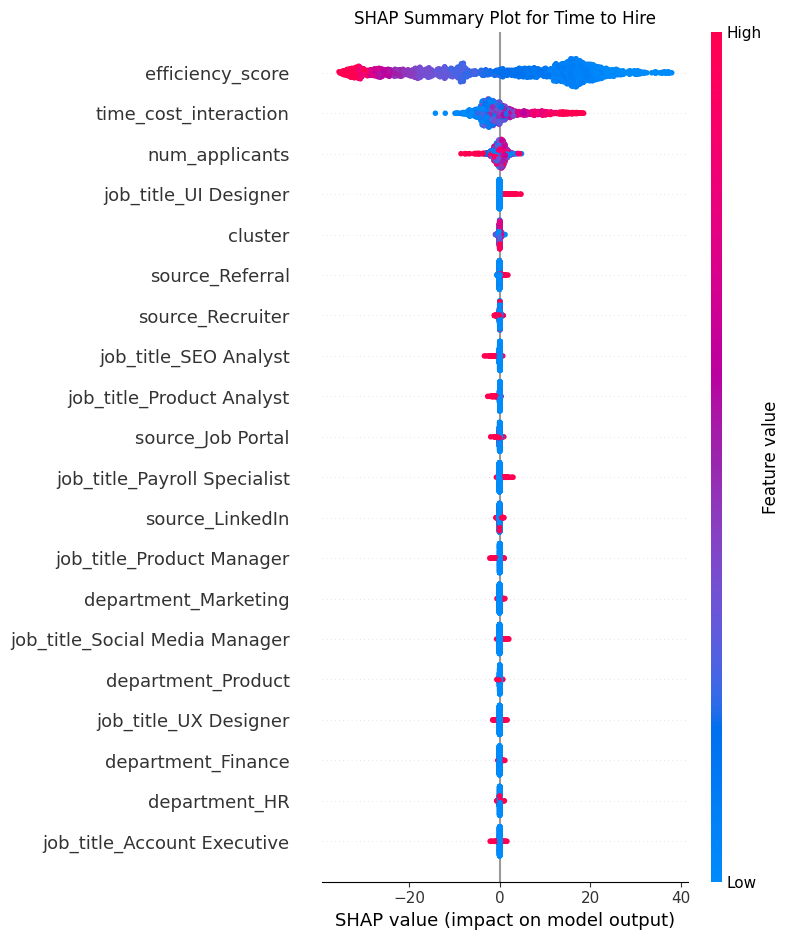

In [75]:
# Membuat SHAP explainer untuk 'Time to Hire' XGBoost model
explainer_time = shap.TreeExplainer(model_time_xgb)

# Menghitung SHAP values untuk test set
shap_values_time = explainer_time.shap_values(X_test)

shap.summary_plot(shap_values_time, X_test, show=False)
plt.title('SHAP Summary Plot for Time to Hire')
plt.tight_layout()
plt.show()

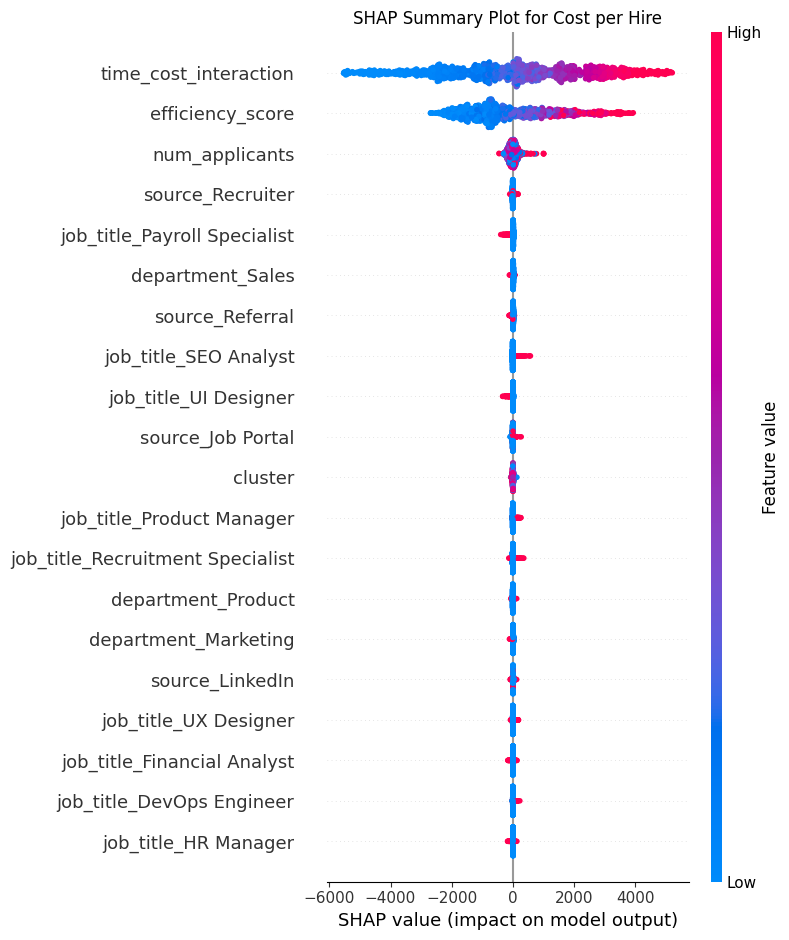

In [76]:
# Membuat SHAP explainer untuk 'Cost per Hire' XGBoost model
explainer_cost = shap.TreeExplainer(model_cost_xgb)

# Menghitung SHAP values untuk test set
shap_values_cost = explainer_cost.shap_values(X_test)

shap.summary_plot(shap_values_cost, X_test, show=False)
plt.title('SHAP Summary Plot for Cost per Hire')
plt.tight_layout()
plt.show()

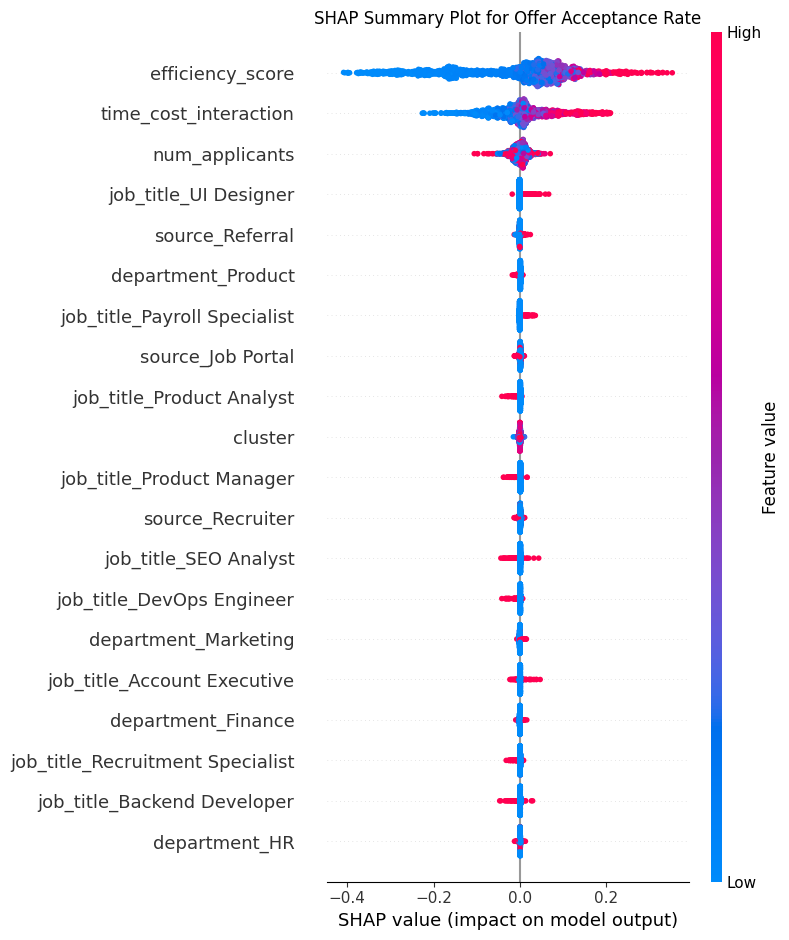

In [77]:
# Membuat SHAP explainer untuk 'Offer Acceptance Rate' XGBoost model
explainer_oar = shap.TreeExplainer(model_oar_xgb)

# Menghitung SHAP values untuk test set
shap_values_oar = explainer_oar.shap_values(X_test)

shap.summary_plot(shap_values_oar, X_test, show=False)
plt.title('SHAP Summary Plot for Offer Acceptance Rate')
plt.tight_layout()
plt.show()

In [78]:
# Add predictions to dataframe
df['pred_time'] = model_time_xgb.predict(X)
df['pred_cost'] = model_cost_xgb.predict(X)
df['pred_oar']  = model_oar_xgb.predict(X)

# Add errors
df['error_time'] = df['pred_time'] - df['time_to_hire_days']
df['error_cost'] = df['pred_cost'] - df['cost_per_hire']
df['error_oar']  = df['pred_oar']  - df['offer_acceptance_rate']

In [79]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def bias_analysis(df, group_col, actual_col, pred_col):
    groups = df[group_col].unique()
    results = []

    for g in groups:
        subset = df[df[group_col] == g]

        mae = mean_absolute_error(subset[actual_col], subset[pred_col])
        rmse = np.sqrt(mean_squared_error(subset[actual_col], subset[pred_col]))
        mape = mean_absolute_percentage_error(subset[actual_col], subset[pred_col])
        bias = (subset[pred_col] - subset[actual_col]).mean()

        results.append([g, mae, rmse, mape, bias, len(subset)])

    return pd.DataFrame(results, columns=[group_col, 'MAE', 'RMSE', 'MAPE', 'Bias (Pred-Actual)', 'Count'])


In [80]:
bias_time_dept = bias_analysis(df, 'department', 'time_to_hire_days', 'pred_time')
print("Bias per department")
print(bias_time_dept)

Bias per department
    department       MAE      RMSE      MAPE  Bias (Pred-Actual)  Count
0  Engineering  6.528082  8.526540  0.168544           -0.047431    803
1        Sales  6.736742  8.887926  0.171254           -0.010071    820
2      Product  6.311546  8.487034  0.161778            0.122029    854
3           HR  6.602305  8.885290  0.177017            0.129563    871
4    Marketing  6.771370  8.960556  0.173727            0.018727    811
5      Finance  6.780375  9.101978  0.171906            0.258787    841


In [81]:
bias_time_job = bias_analysis(df, 'job_title', 'time_to_hire_days', 'pred_time')
print("Bias per job_title")
bias_time_job

Bias per job_title


,job_title,MAE,RMSE,MAPE,Bias (Pred-Actual),Count
0,Software Engineer,6.057968,7.883394,0.154718,0.121590,209
1,Account Executive,6.409726,8.495472,0.168295,-0.256580,202
2,UX Designer,6.376692,8.659634,0.168898,0.036427,233
3,DevOps Engineer,6.201889,8.179831,0.159056,-0.046468,202
4,Talent Acquisition,6.633168,8.914855,0.179014,0.197771,210
5,Marketing Specialist,7.299742,9.797474,0.192275,0.377824,217
6,Accountant,7.038195,9.277316,0.175695,-0.203158,205
7,HR Coordinator,6.281550,8.512352,0.164475,-0.402039,238
8,Recruitment Specialist,6.731985,9.146014,0.176810,0.157176,200
9,Business Development Manager,6.360827,8.568246,0.163677,0.053517,215


In [82]:
bias_time_source = bias_analysis(df, 'source', 'time_to_hire_days', 'pred_time')
print(bias_time_source)

       source       MAE      RMSE      MAPE  Bias (Pred-Actual)  Count
0    Referral  6.581701  8.703176  0.170666            0.261496   1279
1    LinkedIn  6.589112  8.683972  0.173620            0.141203   1291
2   Recruiter  6.838031  9.165044  0.170608           -0.079984   1221
3  Job Portal  6.473900  8.696100  0.167774           -0.012855   1209


In [83]:
bias_cost_dept = bias_analysis(df, 'department', 'cost_per_hire', 'pred_cost')
print("Bias per department")
bias_cost_dept

Bias per department


,department,MAE,RMSE,MAPE,Bias (Pred-Actual),Count
0,Engineering,719.513023,974.521822,0.165098,30.754623,803
1,Sales,719.388487,977.825346,0.172760,-23.914479,820
2,Product,721.554108,968.816442,0.164081,-0.989508,854
3,HR,754.416836,1024.853451,0.174169,-15.856282,871
4,Marketing,753.600811,992.573140,0.174401,-0.931200,811
5,Finance,719.510954,954.202599,0.171597,-18.510843,841


In [84]:
bias_cost_job = bias_analysis(df, 'job_title', 'cost_per_hire', 'pred_cost')
print("Bias per job_title")
bias_cost_job

Bias per job_title


,job_title,MAE,RMSE,MAPE,Bias (Pred-Actual),Count
0,Software Engineer,636.231805,824.283367,0.154871,43.863117,209
1,Account Executive,680.059122,929.356862,0.166027,-26.415484,202
2,UX Designer,729.515054,1035.611016,0.171646,-7.255874,233
3,DevOps Engineer,705.892738,955.612431,0.158701,36.960476,202
4,Talent Acquisition,742.730752,994.927644,0.177938,-16.319850,210
5,Marketing Specialist,798.754818,1078.165156,0.184038,-100.463679,217
6,Accountant,747.395966,973.103521,0.182327,-4.350767,205
7,HR Coordinator,724.881572,961.617578,0.175295,35.537824,238
8,Recruitment Specialist,729.965941,1019.586240,0.170643,21.478165,200
9,Business Development Manager,697.222940,947.834121,0.165089,-5.457817,215


In [85]:
bias_cost_source = bias_analysis(df, 'source', 'cost_per_hire', 'pred_cost')
print("Bias per source")
bias_cost_source

Bias per source


,source,MAE,RMSE,MAPE,Bias (Pred-Actual),Count
0,Referral,716.840508,979.038062,0.165976,-37.751358,1279
1,LinkedIn,726.911878,973.121773,0.170503,-6.282128,1291
2,Recruiter,749.719032,992.611828,0.174035,20.742818,1221
3,Job Portal,733.301553,986.372656,0.171147,4.280099,1209


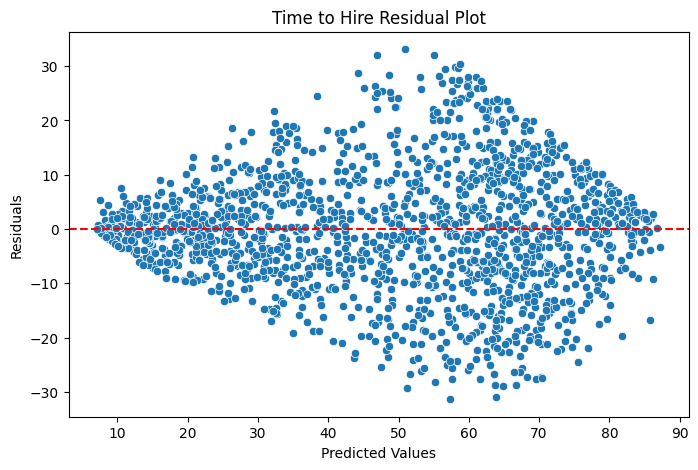

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict
y_pred = model_time_xgb.predict(X_test)

# Residuals
residuals = y_test_time - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Time to Hire Residual Plot")
plt.show()

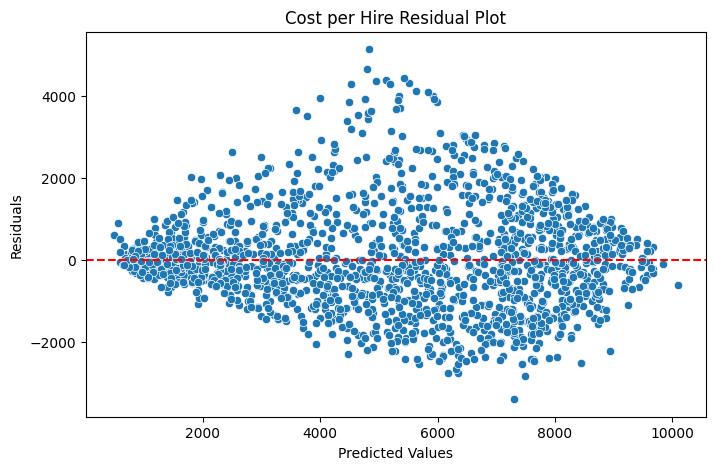

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict
y_pred = model_cost_xgb.predict(X_test)

# Residuals
residuals = y_test_cost - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Cost per Hire Residual Plot")
plt.show()

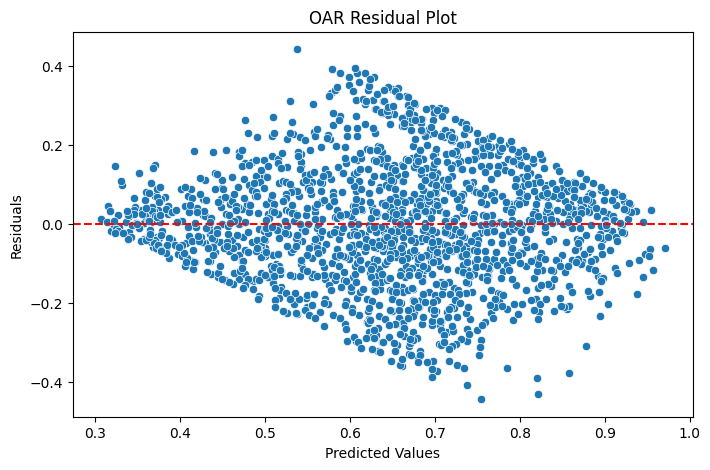

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict
y_pred = model_oar_xgb.predict(X_test)

# Residuals
residuals = y_test_oar - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("OAR Residual Plot")
plt.show()

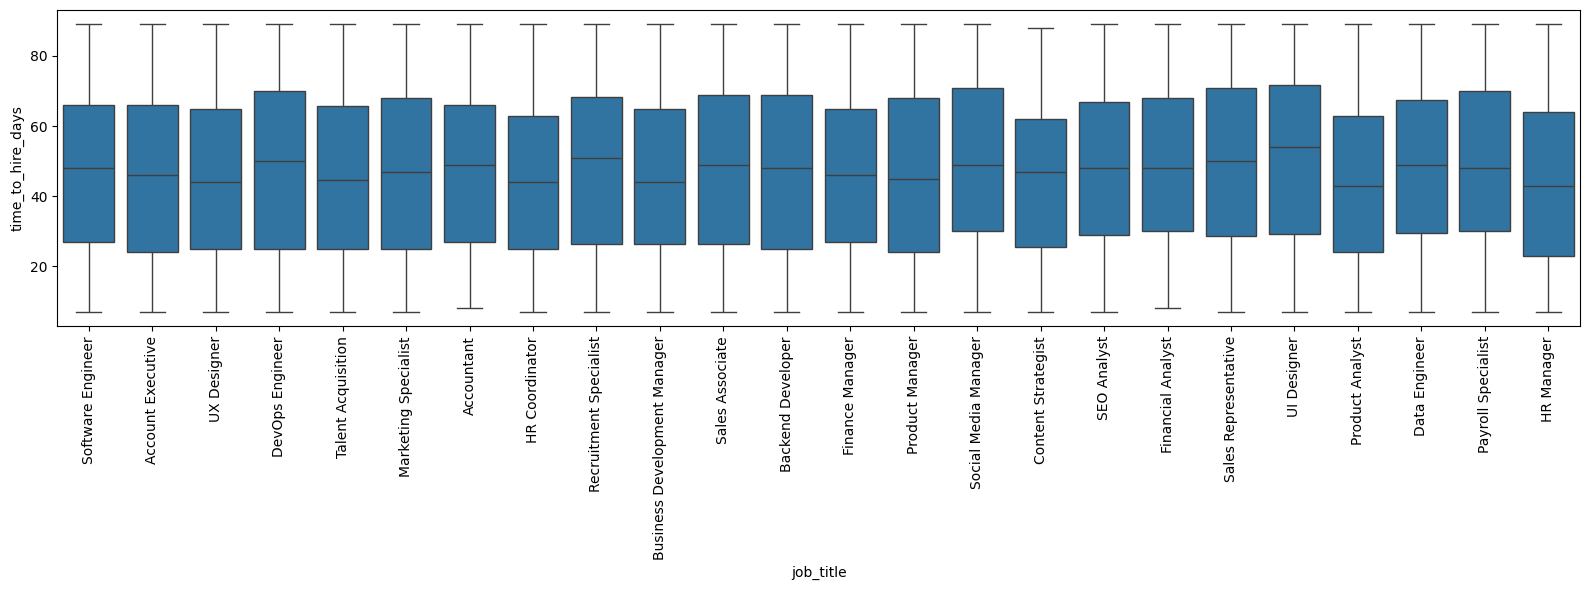

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.boxplot(x="job_title", y="time_to_hire_days", data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [90]:
import scipy.stats as stats

groups = [df[df['job_title'] == jt]['time_to_hire_days']
          for jt in df['job_title'].unique()]

F, p = stats.f_oneway(*groups)
print("ANOVA p-value:", p)

ANOVA p-value: 0.20990610427321443
